In [1]:
import pandas as pd
from sklearn.utils import resample

# Load datasets
ceas = pd.read_csv("../data/raw/CEAS_08.csv")
nazario = pd.read_csv("../data/raw/Nazario.csv")
nigerian = pd.read_csv("../data/raw/Nigerian_Fraud.csv")
spam = pd.read_csv("../data/raw/SpamAssasin.csv")

# Drop rows with essential missing fields
def clean_df(df):
    return df.dropna(subset=["subject", "body", "sender", "label"])

ceas = clean_df(ceas)
nazario = clean_df(nazario)
nigerian = clean_df(nigerian)
spam = clean_df(spam)

# Split CEAS phishing and legit for reuse
ceas_phish = ceas[ceas['label'] == 1]
ceas_legit = ceas[ceas['label'] == 0]


In [2]:
# CLIENT 1: Balanced subset from CEAS (2,500 phishing + 2,500 legit)
client_1_phish = resample(ceas_phish, n_samples=2500, random_state=42)
client_1_legit = resample(ceas_legit, n_samples=2500, random_state=42)

client_1 = pd.concat([client_1_phish, client_1_legit]).sample(frac=1, random_state=42).reset_index(drop=True)

# Save to CSV
client_1.to_csv("../data/clients/client_1.csv", index=False)
print("✅ Client 1 dataset saved: 2,500 phishing + 2,500 legit")


✅ Client 1 dataset saved: 2,500 phishing + 2,500 legit


In [3]:
# CLIENT 2: Nazario (phishing) + legit from CEAS
client_2_phish = nazario[nazario['label'] == 1]

# Sample 1,565 legit (excluding those used in client_1)
remaining_ceas_legit = ceas_legit[~ceas_legit.index.isin(client_1_legit.index)]
client_2_legit = resample(remaining_ceas_legit, n_samples=1565, random_state=42)

client_2 = pd.concat([client_2_phish, client_2_legit]).sample(frac=1, random_state=42).reset_index(drop=True)

# Save to CSV
client_2.to_csv("../data/clients/client_2.csv", index=False)
print("✅ Client 2 dataset saved: 1,565 phishing + 1,565 legit")


✅ Client 2 dataset saved: 1,565 phishing + 1,565 legit


In [4]:
# CLIENT 3: Nigerian Fraud (phishing) + legit from CEAS
client_3_phish = nigerian[nigerian['label'] == 1]

# Remove any indexes used in Client 1 or Client 2 from CEAS legit
used_legit_indexes = set(client_1_legit.index).union(client_2_legit.index)
remaining_legit_ceas = ceas_legit[~ceas_legit.index.isin(used_legit_indexes)]

# Sample 3,332 legit
client_3_legit = resample(remaining_legit_ceas.drop_duplicates(), n_samples=3332, random_state=42)

client_3 = pd.concat([client_3_phish, client_3_legit]).sample(frac=1, random_state=42).reset_index(drop=True)

# Save to CSV
client_3.to_csv("../data/clients/client_3.csv", index=False)
print("✅ Client 3 dataset saved: 3,332 phishing + 3,332 legit")


✅ Client 3 dataset saved: 3,332 phishing + 3,332 legit


In [5]:
# CLIENT 4: Balanced sample from SpamAssassin (1,718 phishing + 1,718 legit)
spam_phish = spam[spam['label'] == 1]
spam_legit = spam[spam['label'] == 0]

client_4_phish = resample(spam_phish, n_samples=1718, random_state=42)
client_4_legit = resample(spam_legit, n_samples=1718, random_state=42)

client_4 = pd.concat([client_4_phish, client_4_legit]).sample(frac=1, random_state=42).reset_index(drop=True)

# Save to CSV
client_4.to_csv("../data/clients/client_4.csv", index=False)
print("✅ Client 4 dataset saved: 1,718 phishing + 1,718 legit")


✅ Client 4 dataset saved: 1,718 phishing + 1,718 legit


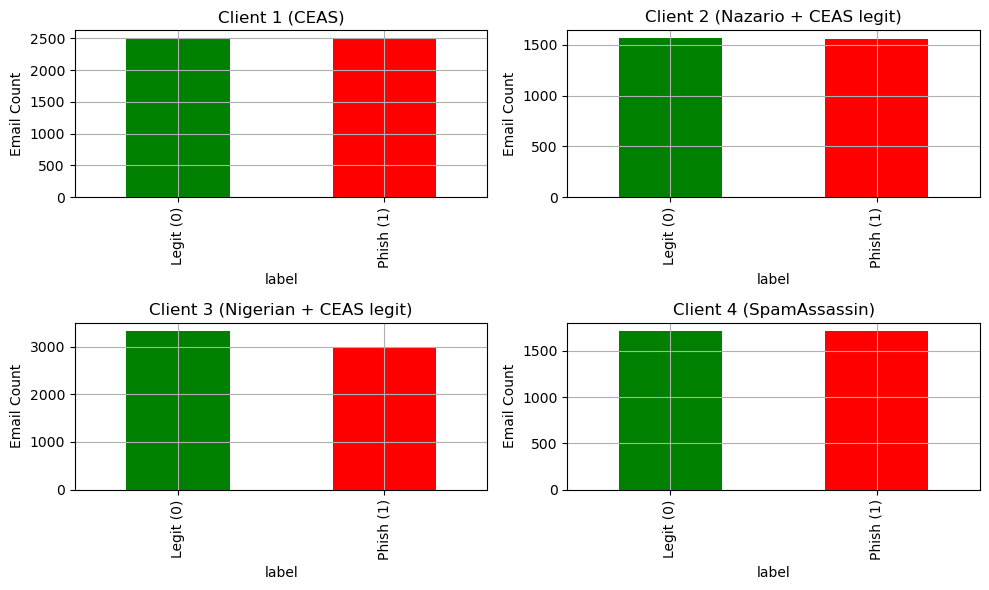

In [6]:
import matplotlib.pyplot as plt

# Load client datasets
client_paths = {
    "Client 1 (CEAS)": "../data/clients/client_1.csv",
    "Client 2 (Nazario + CEAS legit)": "../data/clients/client_2.csv",
    "Client 3 (Nigerian + CEAS legit)": "../data/clients/client_3.csv",
    "Client 4 (SpamAssassin)": "../data/clients/client_4.csv",
}

# Plot label distributions
plt.figure(figsize=(10, 6))
for i, (name, path) in enumerate(client_paths.items(), 1):
    df = pd.read_csv(path)
    counts = df['label'].value_counts()
    plt.subplot(2, 2, i)
    counts.plot(kind='bar', color=['green', 'red'])
    plt.title(name)
    plt.xticks([0, 1], ['Legit (0)', 'Phish (1)'])
    plt.ylabel("Email Count")
    plt.grid(True)

plt.tight_layout()
plt.show()
